In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for 2.1(old car data).csv"
df=pd.read_csv(path)

#We have imported cleaned data/wrangled data

# Basic EDA
### Assume Target variable to be Price(we want to predict the price of  a car based on different variables in the data like engine,fuel type etc)

In [3]:
#describing continous numerical variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,18.076923


In [4]:
#describing categorical variables:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


# Finding imp variables that can help predict target variables from 'CONTINOUS NUMERICAL VARIABLES'

### Finding correlation with pur target variable-PRICE:

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,18.076923


In [6]:
df[['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','peak-rpm','city-mpg','highway-mpg','city-L/100km','highway-L/100km','price']].corr()
#look the correlation of all these with price column in the last and find variables having strong correlation with the price column

# wheel-bas,length,width,curb-weight,engine-size,city-mpg,highway-mpg,city-L/100km,highway-L/100km ,wheel-base,bore have strong correlations

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,0.066171,0.066171,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.238567,0.238567,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.476153,0.476153,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.657373,0.657373,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.673363,0.673363,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.309974,-0.049800,-0.104812,0.003811,0.003811,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,-0.279361,-0.749543,-0.794889,0.785353,0.785353,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,-0.256733,-0.650546,-0.679571,0.745059,0.745059,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,-0.267392,-0.582027,-0.591309,0.554610,0.554610,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,-0.063561,-0.033956,-0.034636,0.036133,0.036133,0.082269


In [7]:
# wheel-bas,length,width,curb-weight,engine-size,city-mpg,highway-mpg,city-L/100km,highway-L/100km ,wheel-base,bore have strong correlations
#FINDING P-value too

x,y=stats.pearsonr(df['wheel-base'],df['price'])

print(f"correlation coefficient is: {x}")
print(f"p-value is: {y}")


correlation coefficient is: 0.5846418222655081
p-value is: 8.076488270732847e-20


In [8]:
#we can make a function for finding correlation coefficient and pearson value for all the columns

list_of_col=[df['wheel-base'],df['length'],df['width'],df['curb-weight'],df['engine-size'],df['city-mpg'],df['highway-mpg'],df['city-L/100km'],df['highway-L/100km']]

def calc_correlation(a,b):
    p,q=stats.pearsonr(a,b)
    
    print(f"{a.name}---------\n")
    print(f"correlation coefficient: {p}")
    print(f"p-value: {q}")
    print("")


for i in list_of_col:
    calc_correlation(i,df['price'])

wheel-base---------

correlation coefficient: 0.5846418222655081
p-value: 8.076488270732847e-20

length---------

correlation coefficient: 0.690628380448364
p-value: 8.016477466158899e-30

width---------

correlation coefficient: 0.7512653440522674
p-value: 9.200335510481227e-38

curb-weight---------

correlation coefficient: 0.8344145257702845
p-value: 2.189577238893924e-53

engine-size---------

correlation coefficient: 0.8723351674455185
p-value: 9.26549162219869e-64

city-mpg---------

correlation coefficient: -0.6865710067844679
p-value: 2.3211320655675065e-29

highway-mpg---------

correlation coefficient: -0.7046922650589529
p-value: 1.7495471144476634e-31

city-L/100km---------

correlation coefficient: 0.7898975136626941
p-value: 3.9031064009402367e-44

highway-L/100km---------

correlation coefficient: 0.7898975136626941
p-value: 3.9031064009402367e-44



In [9]:
print(df['price'].name)#to check if this works (used it in loop in previous cell)

price


### Creating regression-scatter plots for continous numerical variables(taking some variables on x axis and Price on y-axis):

list_of_col=[df['wheel-base'],df['length'],df['width'],df['curb-weight'],df['engine-size'],df['city-mpg'],df['highway-mpg'],df['city-L/100km'],df['highway-L/100km']]



<Axes: xlabel='wheel-base', ylabel='price'>

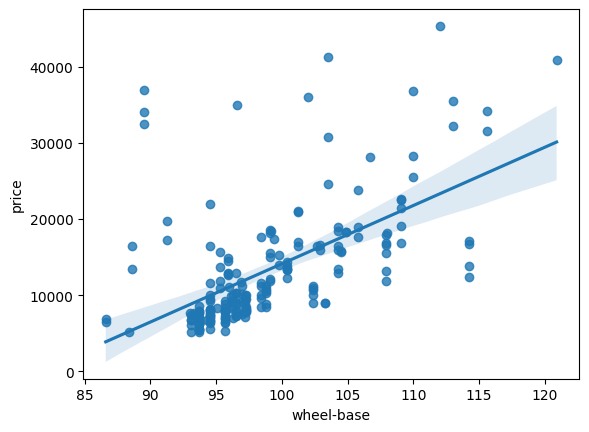

In [10]:
sns.regplot(x='wheel-base',y='price',data=df)
#Shows strong correlation of price with wheel base

<Axes: xlabel='length', ylabel='price'>

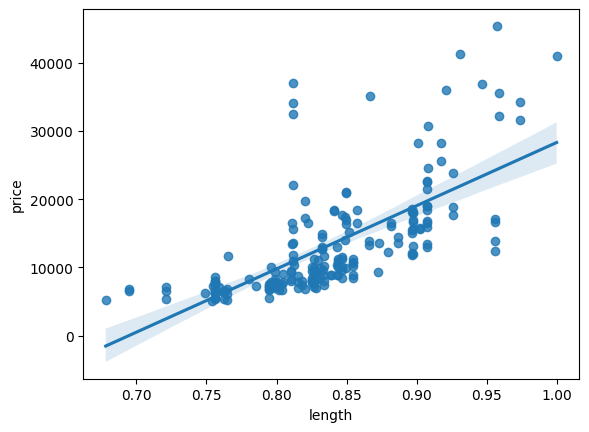

In [11]:
sns.regplot(x='length',y='price',data=df)

<Axes: xlabel='width', ylabel='price'>

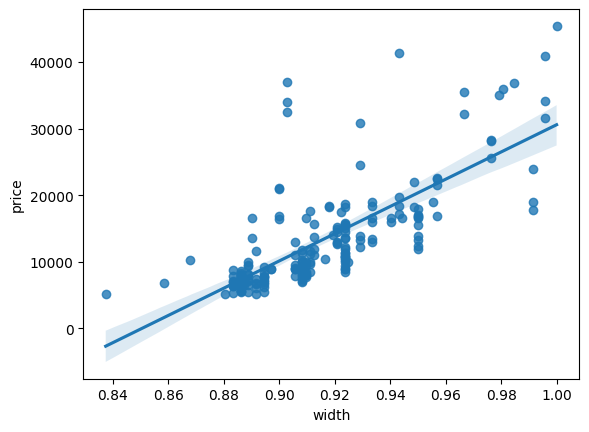

In [12]:
sns.regplot(x='width',y='price',data=df)

<Axes: xlabel='curb-weight', ylabel='price'>

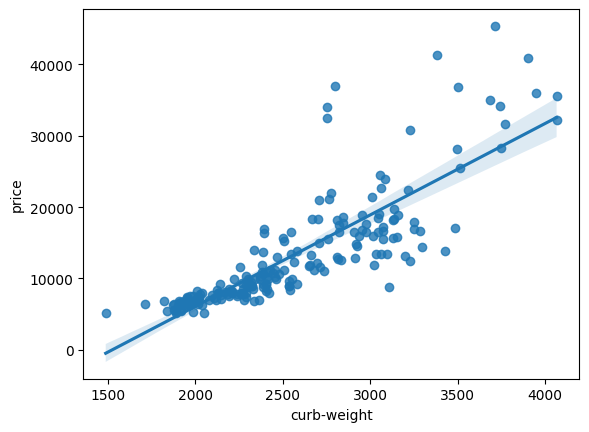

In [13]:
sns.regplot(x='curb-weight',y='price',data=df)

<Axes: xlabel='engine-size', ylabel='price'>

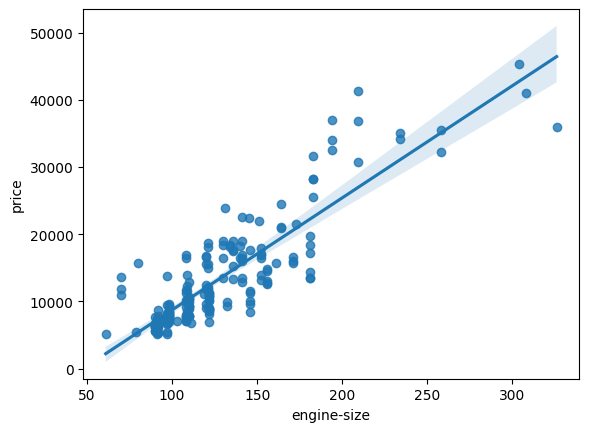

In [14]:
sns.regplot(x='engine-size',y='price',data=df)

<Axes: xlabel='city-mpg', ylabel='price'>

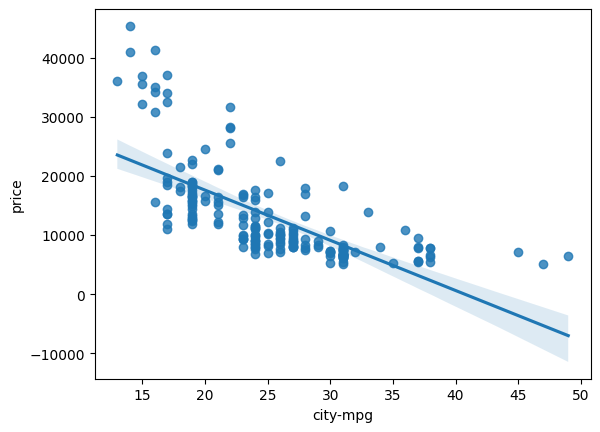

In [15]:
sns.regplot(x='city-mpg',y='price',data=df)
#strong negative linear correlation

<Axes: xlabel='highway-mpg', ylabel='price'>

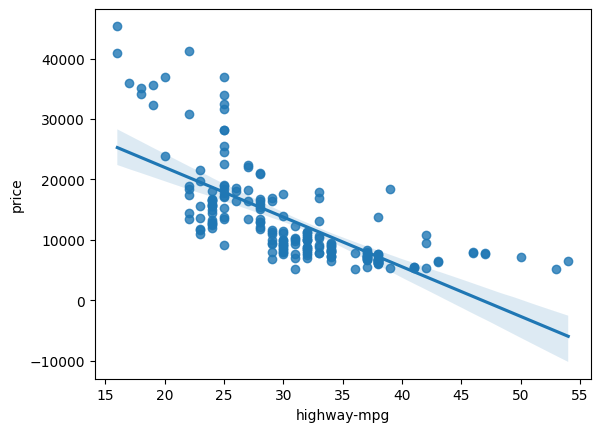

In [16]:
sns.regplot(x='highway-mpg',y='price',data=df)
#strong negative linear correlation

<Axes: xlabel='city-L/100km', ylabel='price'>

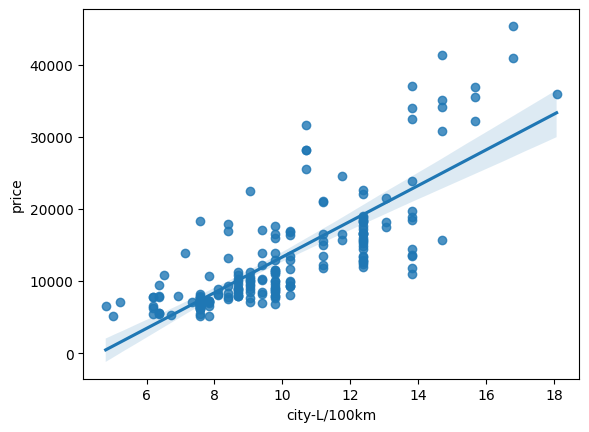

In [17]:
sns.regplot(x='city-L/100km',y='price',data=df)

<Axes: xlabel='highway-L/100km', ylabel='price'>

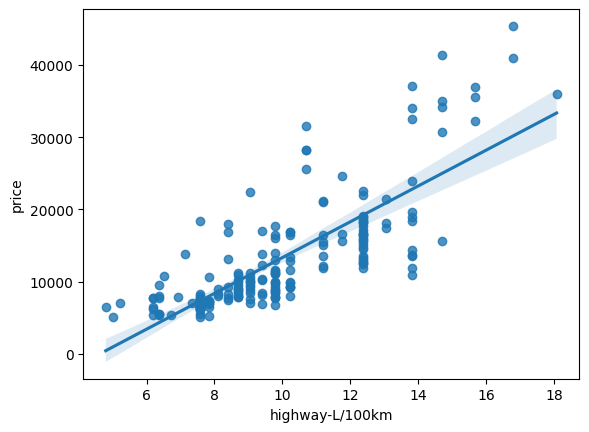

In [18]:
sns.regplot(x='highway-L/100km',y='price',data=df)

### Variables with Weak correlations with price:(we wont be choosing these variables for predicting the price):

<Axes: xlabel='symboling', ylabel='price'>

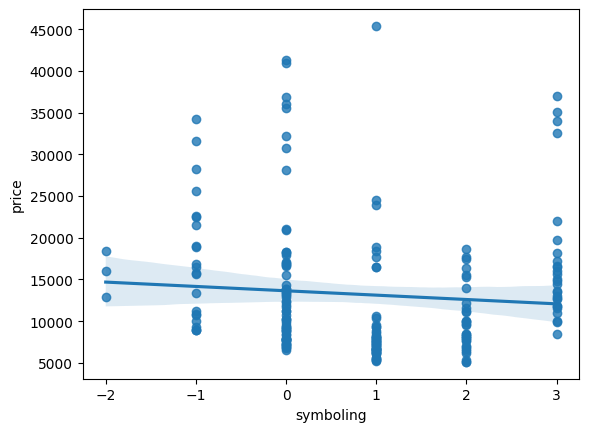

In [19]:
sns.regplot(x='symboling',y='price',data=df)

<Axes: xlabel='normalized-losses', ylabel='price'>

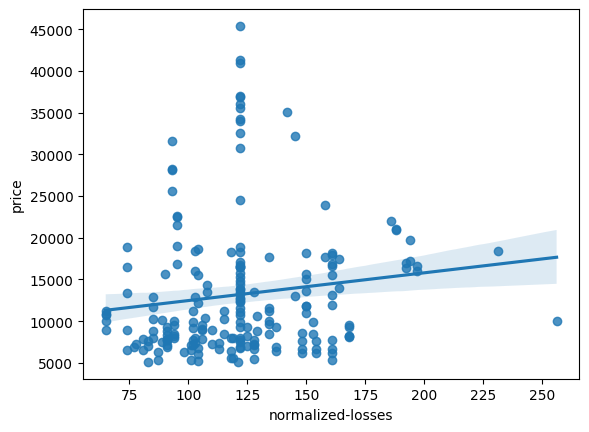

In [20]:
sns.regplot(x='normalized-losses',y='price',data=df)

<Axes: xlabel='height', ylabel='price'>

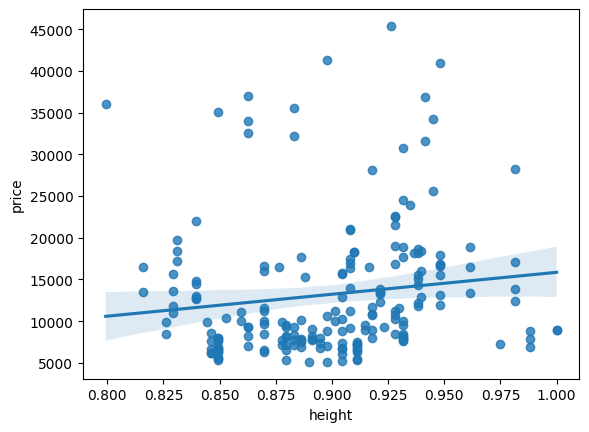

In [21]:
sns.regplot(x='height',y='price',data=df)

<Axes: xlabel='bore', ylabel='price'>

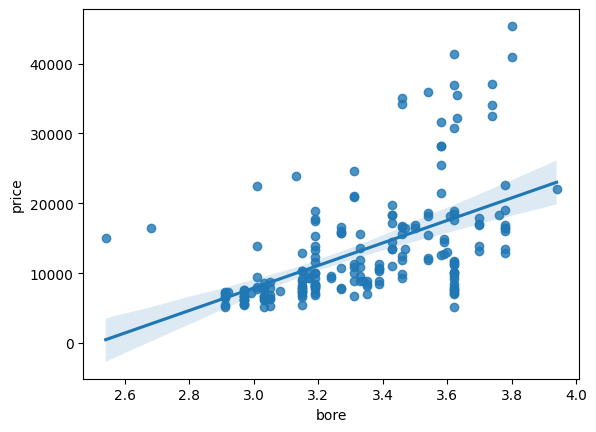

In [22]:
sns.regplot(x='bore',y='price',data=df)

<Axes: xlabel='stroke', ylabel='price'>

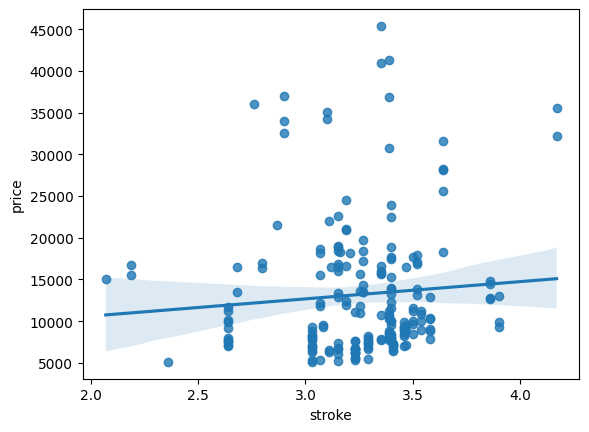

In [23]:
sns.regplot(x='stroke',y='price',data=df)

<Axes: xlabel='compression-ratio', ylabel='price'>

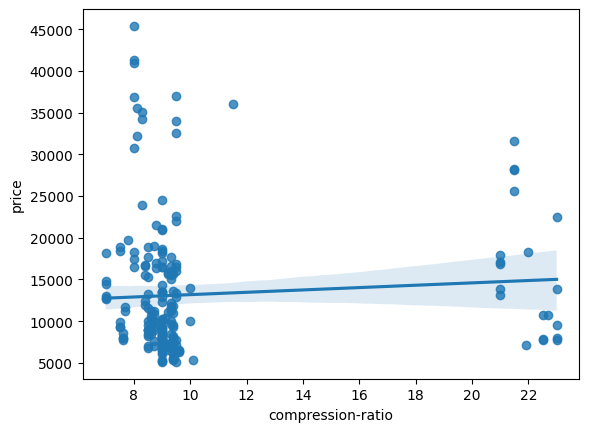

In [24]:
sns.regplot(x='compression-ratio',y='price',data=df)

<Axes: xlabel='peak-rpm', ylabel='price'>

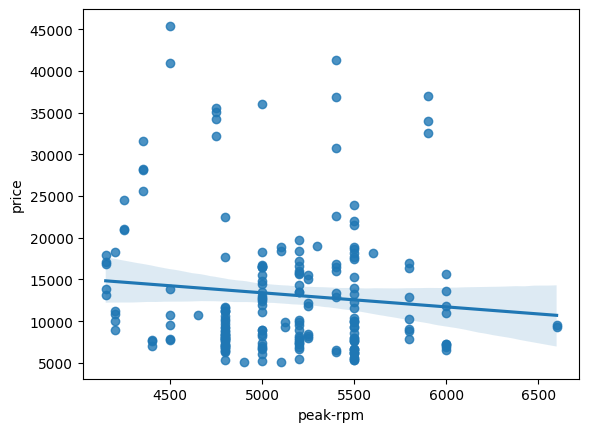

In [25]:
sns.regplot(x='peak-rpm',y='price',data=df)

------------------------------------------------------------END OF CONTINOUS NUMERICAL VARIABLE----------------------------------------------------

## Finding correlations /relationships with CATEGORICAL VARIABLES:

### list of categorical variables:

In [26]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


### finding value counts for all and storing them in a dataframe :

In [27]:
make=df['make'].value_counts().to_frame()
make

,count
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11


In [28]:
num_of_doors=df['num-of-doors'].value_counts().to_frame()
body_style=df['body-style'].value_counts().to_frame()
drive_wheels=df['drive-wheels'].value_counts().to_frame()
engine_location=df['engine-location'].value_counts().to_frame()
engine_type=df['engine-type'].value_counts().to_frame()
num_of_cylinders=df['num-of-cylinders'].value_counts().to_frame()
fuel_system=df['fuel-system'].value_counts().to_frame()
horsepower_binned=df['horsepower_binned'].value_counts().to_frame()



In [29]:
num_of_doors.reset_index(inplace=True)
num_of_doors

,num-of-doors,count
0,four,115
1,two,86


In [30]:
body_style.reset_index(inplace=True)
body_style

,body-style,count
0,sedan,94
1,hatchback,68
2,wagon,25
3,hardtop,8
4,convertible,6


In [31]:
drive_wheels.reset_index(inplace=True)
drive_wheels

,drive-wheels,count
0,fwd,118
1,rwd,75
2,4wd,8


In [32]:
#NOTE-WE CANNOT USE THIS VARIALE FOR PREDICTION BECAUSE IT DOES NOT HAVE ENOUGH VALUE FOR REAR AND THE DATA WOULD BE BIASED

engine_location.reset_index(inplace=True)
engine_location

,engine-location,count
0,front,198
1,rear,3


In [33]:
engine_type.reset_index(inplace=True)
engine_type

,engine-type,count
0,ohc,145
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4


In [34]:
num_of_cylinders.reset_index(inplace=True)
num_of_cylinders


,num-of-cylinders,count
0,four,157
1,six,24
2,five,10
3,eight,4
4,two,4
5,twelve,1
6,three,1


In [35]:
fuel_system.reset_index(inplace=True)
fuel_system

,fuel-system,count
0,mpfi,92
1,2bbl,64
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


In [36]:
horsepower_binned.reset_index(inplace=True)
horsepower_binned

,horsepower_binned,count
0,low,153
1,medium,43
2,high,5


## Checking distribution of continous variables using BOX PLOT to check which variable to use for prediction:(taking diff. variables as x but y as Price only)

In [37]:
obj_col=df.describe(include=['object'])
obj_col#i made a dataframe of object type columns only for convenience

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


In [38]:
obj_col.columns

Index(['make', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower_binned'],
      dtype='object')

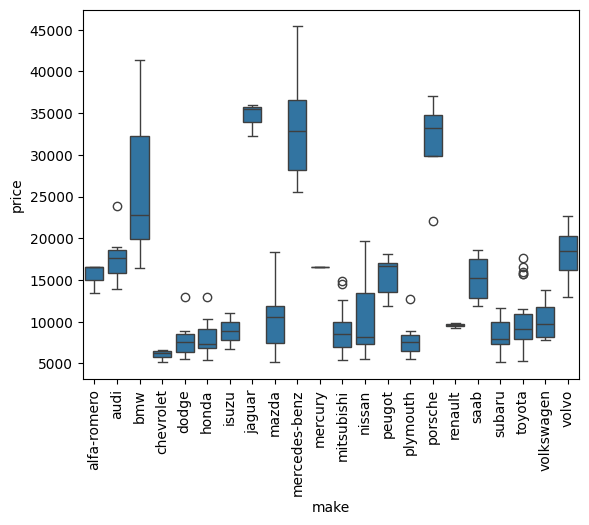

In [39]:
sns.boxplot(x='make',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#cannot use 'make' to predict price as the data overlaps too much

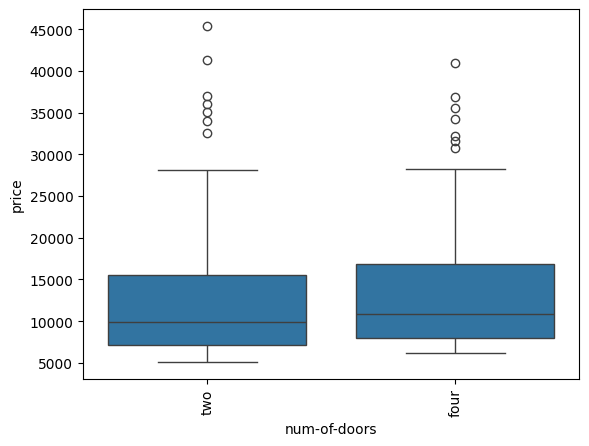

In [40]:
sns.boxplot(x='num-of-doors',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#both doors- two or four ,have almost same price and hence we cannot use any of these to predict prices of cars

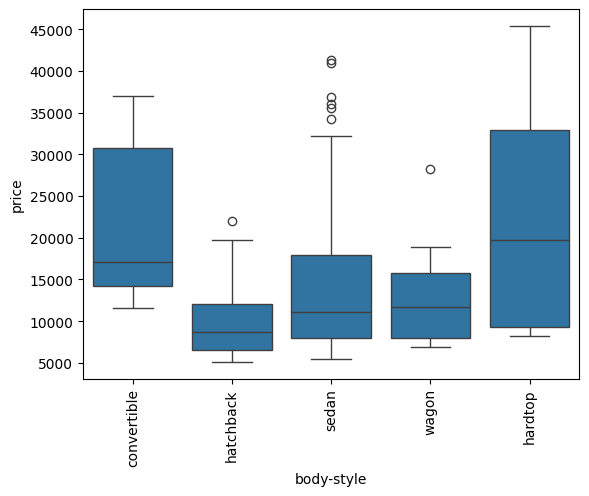

In [41]:
sns.boxplot(x='body-style',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#cannot use to predict price as the data overlaps too much

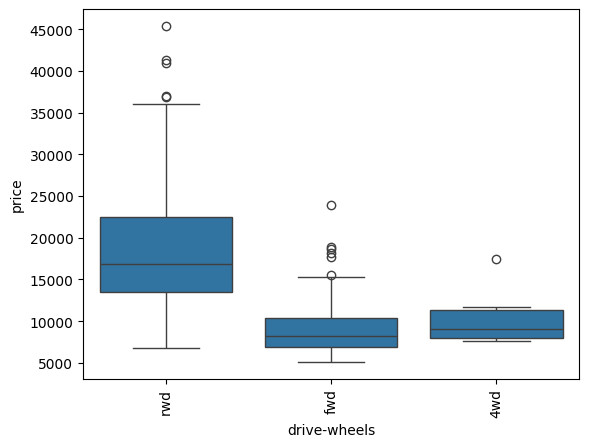

In [42]:
sns.boxplot(x='drive-wheels',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#CAN be used for prediction

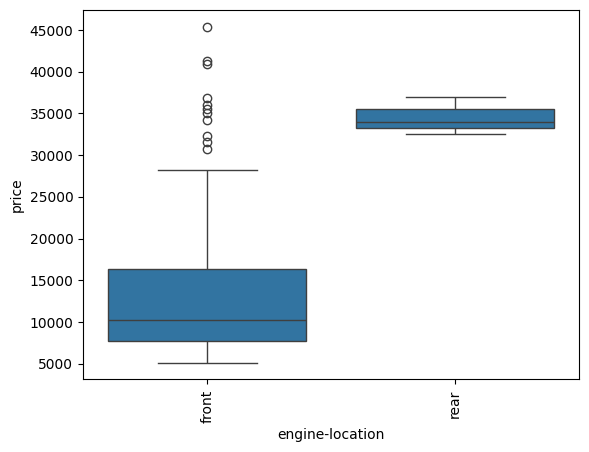

In [43]:
sns.boxplot(x='engine-location',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#can use this for prediction

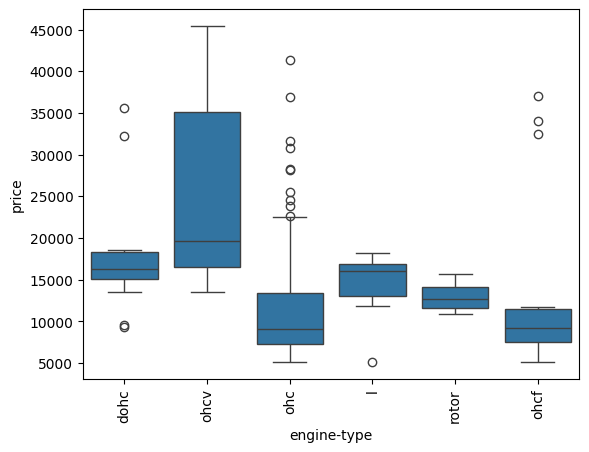

In [44]:
sns.boxplot(x='engine-type',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#cannot use to predict price as the data overlaps too much

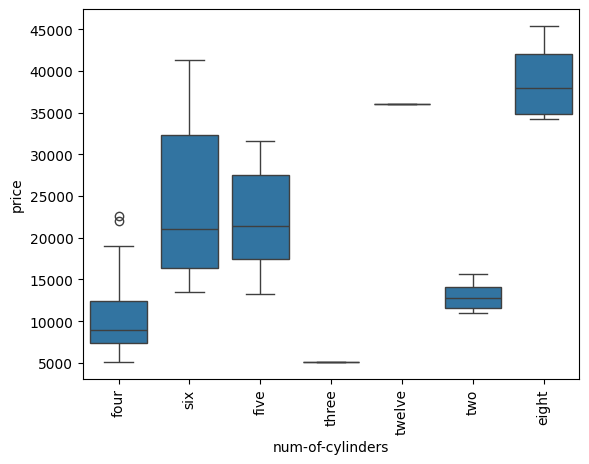

In [45]:
sns.boxplot(x='num-of-cylinders',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
# Can use this for prediction

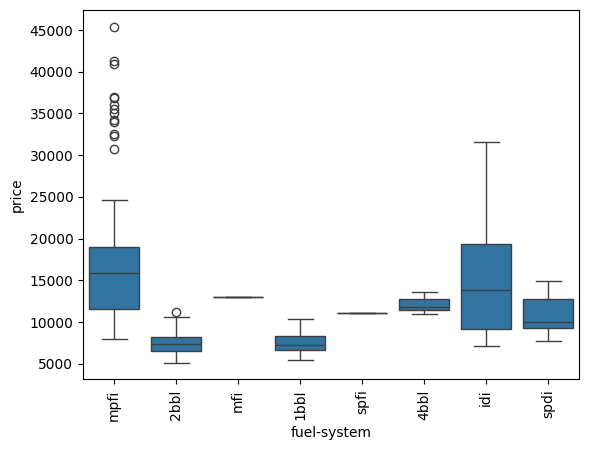

In [46]:
sns.boxplot(x='fuel-system',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#cannot use to predict price as the data overlaps too much

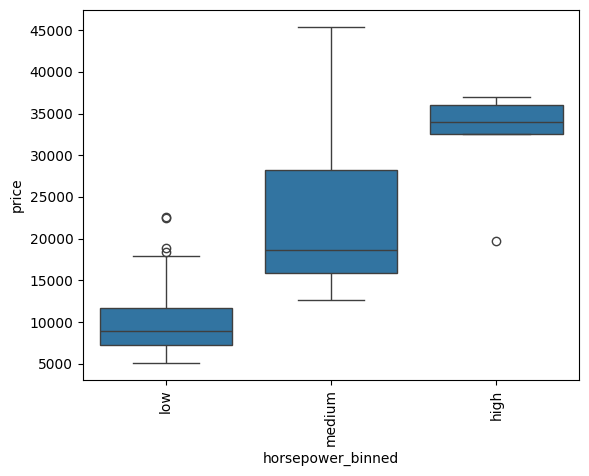

In [47]:
sns.boxplot(x='horsepower_binned',y='price',data=df)
plt.xticks(rotation=90)
plt.show()
#can use for prediction

#### horsepower,number of cylinders,engine location,drive wheels are the categorical variables that can be used for predicting prices

## Grouping :Use the "groupby" function to find the average "price" of each car based on "body-style"

In [48]:
df.groupby('body-style')['price'].mean()

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64

In [49]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle
#this is same as the cell above

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


-------------------------------------------------------------------END OF EDA-----------------------------------------------------------------